In [1]:
import os
import glob

import random
random.seed(42)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class CFG:
    img_dim1 = 20
    img_dim2 = 8
    img_dpi = 300

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'lines.linewidth': 1.5})
plt.rcParams.update({'figure.dpi': CFG.img_dpi})
plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})

---

## KFall Data

### Read Raw Data

In [195]:
df = pd.read_csv('../../../Downloads/KFall/sensor_data/SA06/S06T21R04.csv')
df['TimeStamp(s)'] = pd.to_datetime(df['TimeStamp(s)'], unit='s')
df = df.set_index('TimeStamp(s)')
df.head(3)

,FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
TimeStamp(s),,,,,,,,,,
1970-01-01 00:00:00.010,1,-0.049,-1.004,0.071,0.802141,-2.234536,0.572958,93.85052,-1.707415,-39.769015
1970-01-01 00:00:00.020,2,-0.050,-1.005,0.059,0.000000,-1.317803,0.057296,93.85052,-1.707415,-39.780474
1970-01-01 00:00:00.030,3,-0.047,-1.010,0.062,0.000000,-1.604282,0.057296,93.85052,-1.707415,-39.797663


In [196]:
df.shape

(467, 10)

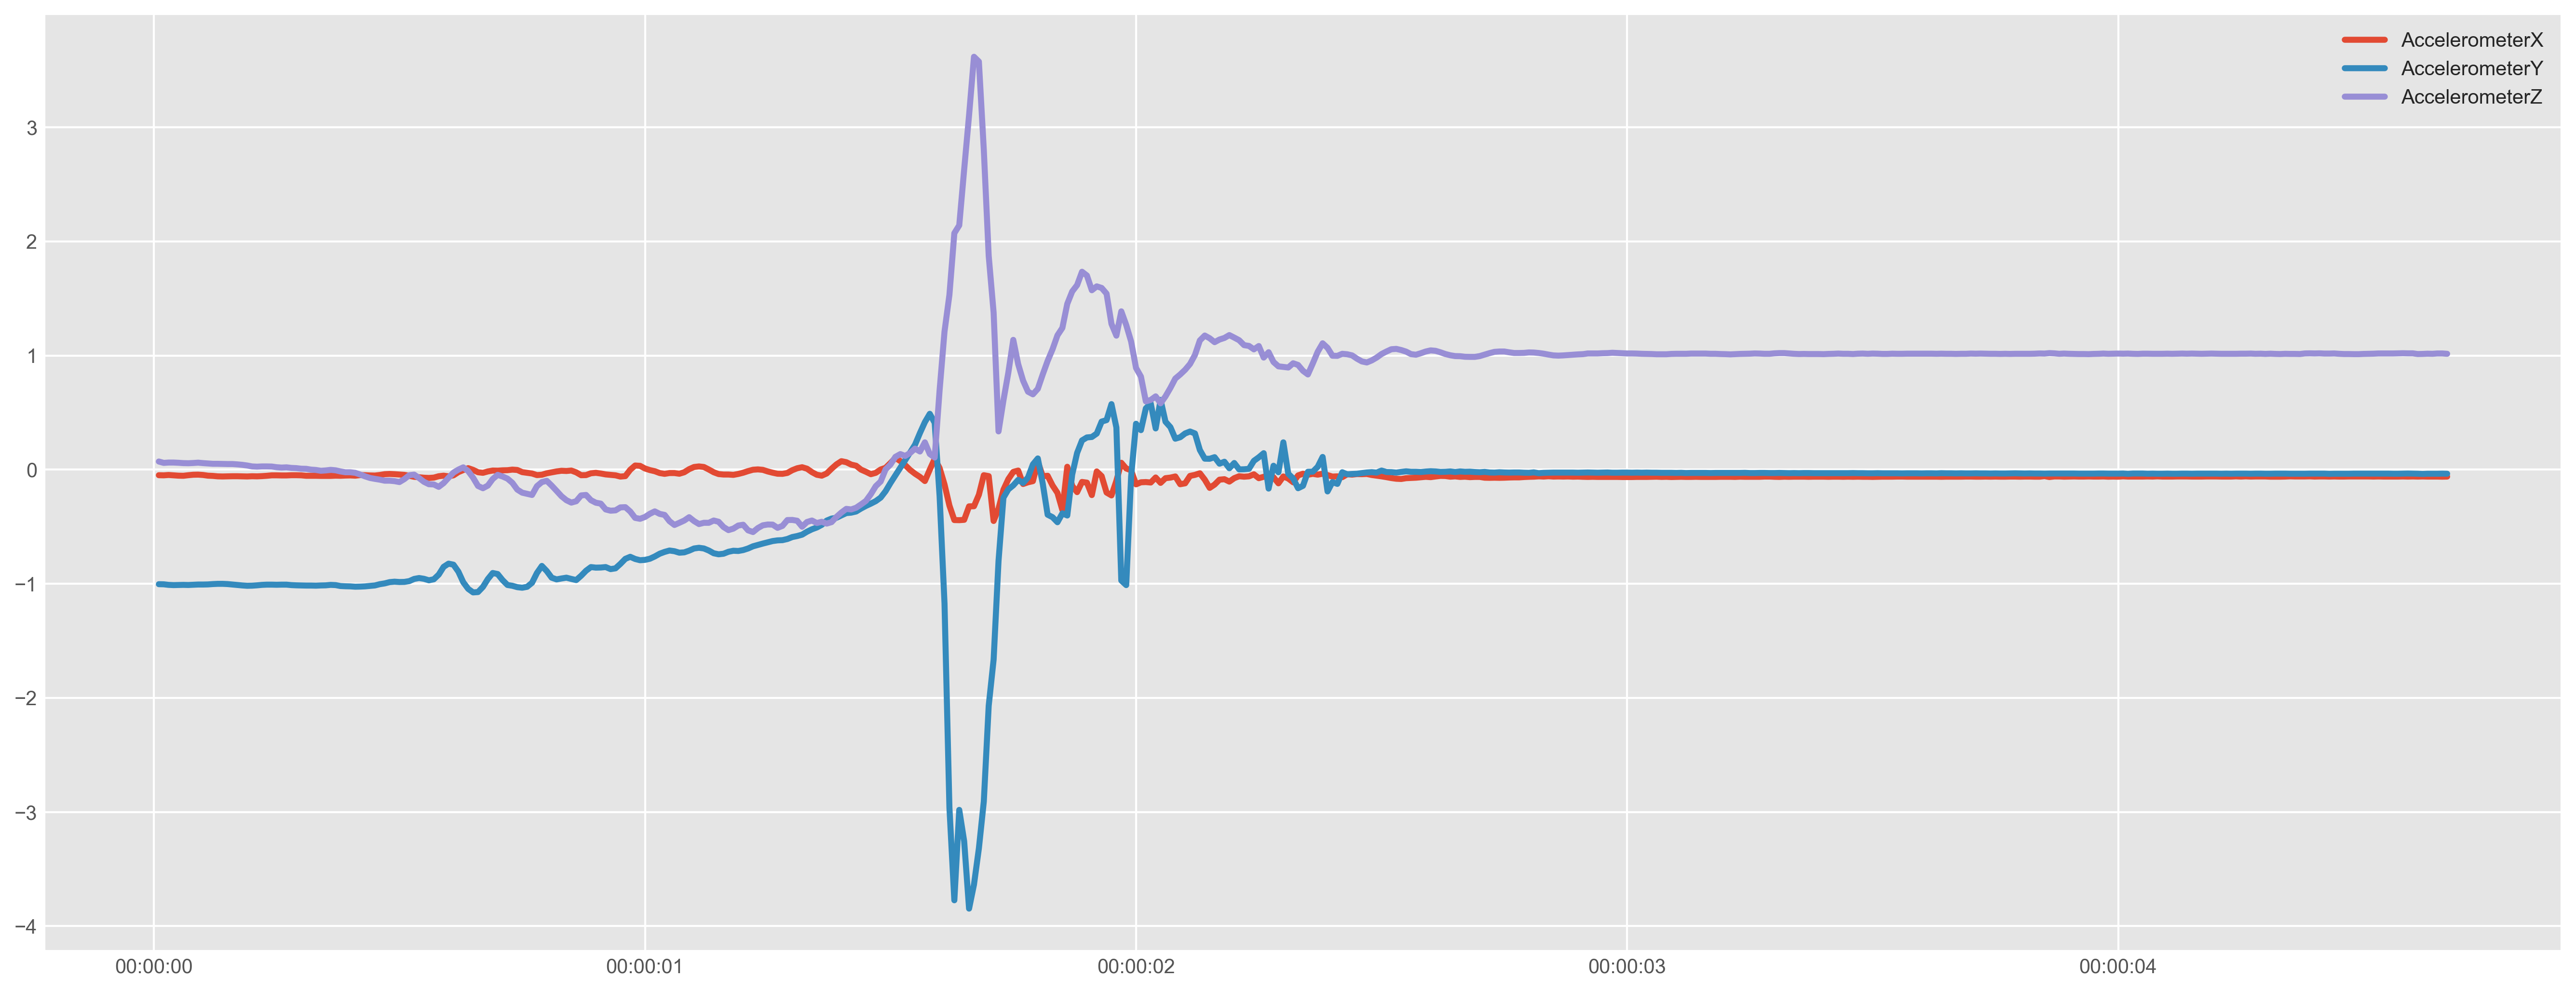

In [197]:
# Plot the Accelerometer data wrt FrameCounter
fig, ax = plt.subplots(1,1)
ax.plot(df['AccX'], label='AccelerometerX')
ax.plot(df['AccY'], label='AccelerometerY')
ax.plot(df['AccZ'], label='AccelerometerZ')
ax.legend()
plt.show()

In [45]:
df_label = pd.read_excel('../../../Downloads/KFall/label_data/SA32_label.xlsx')
df_label.head(15)

,Task Code (Task ID),Description,Trial ID,Fall_onset_frame,Fall_impact_frame
0,F01 (20),Forward fall when trying to sit down,1,334,443
1,NaN,NaN,2,316,422
2,NaN,NaN,3,325,426
3,NaN,NaN,4,351,457
4,NaN,NaN,5,317,415
5,F02 (21),Backward fall when trying to sit down,1,317,385
6,NaN,NaN,2,295,363
7,NaN,NaN,3,306,376
8,NaN,NaN,4,336,404
9,NaN,NaN,5,320,381


In [3]:
task_details = pd.read_csv('../../../Downloads/KFall/Task_Details.csv')
# Set the colum names to be the second row
task_details.columns = task_details.iloc[1]
# Drop the first two rows
task_details = task_details.drop([0,1])
task_details.head(10)

1,Task Code,Task ID,Description,Demo video link
2,D01,01,Stand for 30 seconds,https://drive.google.com/file/d/1VC9YeNUX5iWng...
3,D02,02,"Stand, slowly bend the back with or without be...",https://drive.google.com/file/d/1V3S83c_-9jJPd...
4,D03,03,Pick up an object from the floor,https://drive.google.com/file/d/1BRHlyvjI8TCmP...
5,D04,04,Gently jump (try to reach an object),https://drive.google.com/file/d/1Cxsfg2H2-aeIq...
6,D05,05,"Stand, sit to the ground, wait a moment, and g...",https://drive.google.com/file/d/16oLSgn_oJhDkZ...
7,D06,06,Walk normally with turn (4m),https://drive.google.com/file/d/1WB0yQWizV00Lp...
8,D07,07,Walk quickly with turn (4m),https://drive.google.com/file/d/1F5bKRfYjLYmO9...
9,D08,08,Jog normally with turn (4m),https://drive.google.com/file/d/1Mb_p5Vkqg-D4H...
10,D09,09,Jog quickly with turn (4m),https://drive.google.com/file/d/1xHyqT9C797k9E...
11,D10,10,Stumble while walking,https://drive.google.com/file/d/1gqXHZi-uvDvBV...


In [3]:
def get_all_files_dict_array():
	# Get all the files in the folder
	files = glob.glob('../../../Downloads/KFall/sensor_data/*/*.csv')
	# label_files = glob.glob('../../../Downloads/KFall/label_data/*/*.xlsx')
	print(f'Total number of files: {len(files)}')

	# Get the subject ID, task ID and trial ID from the file name, and save both the files and these details in a dictionary
	file_dict = {}

	# Read the task details
	task_details = pd.read_csv('../../../Downloads/KFall/Task_Details.csv')
	task_details.columns = task_details.iloc[1] # Set the colum names to be the second row
	task_details = task_details.drop([0,1]) # Drop the first two rows

	# Get the subject ID, task ID and trial ID from the file name
	def get_file_details(file_name):
		# Take "S06T01R01.csv" as an example, "SA06" means Subject ID is 06; "T01" means Task ID is 01; "R01" means Trial ID is 01
		file_name = os.path.basename(file)
		subject_id = file_name[1:3]
		task_id = file_name[4:6]
		trial_id = file_name[7:9]
		return subject_id, task_id, trial_id
	
	def get_task_details(task_id):
		task_description: str = task_details[task_details['Task ID'] == task_id]['Description'].values[0]
		task_code: str = task_details[task_details['Task ID'] == task_id]['Task Code'].values[0]
		task_class = 'ADL' if task_code[0] == 'D' else 'Fall'
		return task_description, task_code, task_class

	# Process the dataframe: convert the timestamp to datetime format and set the timestamp as the index
	def process_dataframe(df: pd.DataFrame):
		df['TimeStamp(s)'] = pd.to_datetime(df['TimeStamp(s)'], unit='s')
		df.set_index('TimeStamp(s)', inplace=True)
		df.drop(['FrameCounter'], axis=1, inplace=True)
		return df

	# Go through all the files and save the details in the dictionary
	counter = 0
	failed = 0
	for file in files:
		try:
			file_name = os.path.basename(file)
			subject_id, task_id, trial_id = get_file_details(file)
			task_description, task_code, task_class = get_task_details(task_id)
			df = pd.read_csv(file)
			df = process_dataframe(df)
			file_dict[file_name] = {
				'dataframe': df, 
				'subject_id': subject_id, 
				'task_id': task_id, 
				'trial_id': trial_id,
				'task_description': task_description,
				'task_code': task_code,
				'task_class': task_class
			}
		except Exception as e:
			failed += 1
			print(f'Error: {e} when processing file {file}')
		finally:
			counter += 1
			percentage = counter * 100 / len(files)
			if percentage % 10 == 0.0:
				print(f'Processed {percentage}% files')

	print(f'Processed {counter} files')
	print(f'Failed to process {failed} files')	
	return file_dict

In [4]:
file_dict = get_all_files_dict_array()

Total number of files: 5075
Processed 20.0% files
Processed 40.0% files
Processed 60.0% files
Processed 80.0% files
Processed 100.0% files
Processed 5075 files
Failed to process 0 files


In [5]:
# Get the number of items in each class
print(f'Number of ADL items: {len([item for item in file_dict.values() if item["task_class"] == "ADL"])}')
print(f'Number of Fall items: {len([item for item in file_dict.values() if item["task_class"] == "Fall"])}')

Number of ADL items: 2729
Number of Fall items: 2346


In [6]:
# Get the number of items of each task
task_ids = [item['task_id'] for item in file_dict.values()]
task_ids = list(set(task_ids))
task_ids.sort()
task_id_counts = {
    task_id: len([item for item in file_dict.values() if item['task_id'] == task_id]) 
    for task_id in task_ids
}
task_id_counts

{'01': 32,
 '02': 157,
 '03': 157,
 '04': 160,
 '05': 156,
 '06': 151,
 '07': 154,
 '08': 156,
 '09': 151,
 '10': 159,
 '11': 32,
 '12': 32,
 '13': 149,
 '14': 155,
 '15': 157,
 '16': 152,
 '17': 32,
 '18': 152,
 '19': 149,
 '20': 159,
 '21': 161,
 '22': 161,
 '23': 155,
 '24': 157,
 '25': 158,
 '26': 155,
 '27': 158,
 '28': 154,
 '29': 152,
 '30': 153,
 '31': 150,
 '32': 160,
 '33': 158,
 '34': 155,
 '35': 137,
 '36': 149}

### Prepare Data for training

In [7]:
# Prepare the data for training
def prepare_data(file_dict: dict):
	# Select the first item in the dictionary to get the shape of the data
	file_shapes = [item['dataframe'].shape for item in file_dict.values()]
	# Get the maximum number of rows and columns
	max_rows = max([shape[0] for shape in file_shapes])
	cols = file_shapes[0][1]
	train_data = np.zeros((len(file_dict), max_rows, cols))
	print(f'Shape of the training data: {train_data.shape}')
	train_labels = np.array([])
	train_labels_multiclass = np.array([])

	counter = 0
	for _, file_details in file_dict.items():
		df = file_details['dataframe']
		task_class = file_details['task_class']
		task_code = file_details['task_code']
		df = df.to_numpy()
		# if df.shape[0] is not equal to max_rows, pad the data with zeros in the beginning
		if df.shape[0] < max_rows:
			df = np.pad(df, ((max_rows - df.shape[0], 0), (0, 0)), 'constant', constant_values=0)
		train_data[counter] = df
		train_labels = np.append(train_labels, task_class)
		train_labels_multiclass = np.append(train_labels_multiclass, task_code)
		counter += 1
		if counter % 200 == 0:
			print(f'Processed {counter} files')

	# train_data.reshape(-1, 1)
	return train_data, train_labels, train_labels_multiclass

In [8]:
train_data, train_labels, train_labels_multiclass = prepare_data(file_dict)
train_data.shape, train_labels.shape, train_labels_multiclass.shape

Shape of the training data: (5075, 4087, 9)
Processed 200 files
Processed 400 files
Processed 600 files
Processed 800 files
Processed 1000 files
Processed 1200 files
Processed 1400 files
Processed 1600 files
Processed 1800 files
Processed 2000 files
Processed 2200 files
Processed 2400 files
Processed 2600 files
Processed 2800 files
Processed 3000 files
Processed 3200 files
Processed 3400 files
Processed 3600 files
Processed 3800 files
Processed 4000 files
Processed 4200 files
Processed 4400 files
Processed 4600 files
Processed 4800 files
Processed 5000 files


((5075, 4087, 9), (5075,), (5075,))

In [10]:
list(file_dict.values())[0]['dataframe'].head(2)

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
TimeStamp(s),,,,,,,,,
1970-01-01 00:00:00.010,0.022,-0.993,0.162,-0.229183,-0.630254,-0.572958,98.777959,1.506880,-22.207852
1970-01-01 00:00:00.020,0.025,-0.995,0.159,-0.286479,-0.687550,-0.458366,98.777959,1.512609,-22.213582


Visualize a random time series from the data

Text(0.5, 1.0, 'Activity: Fall')

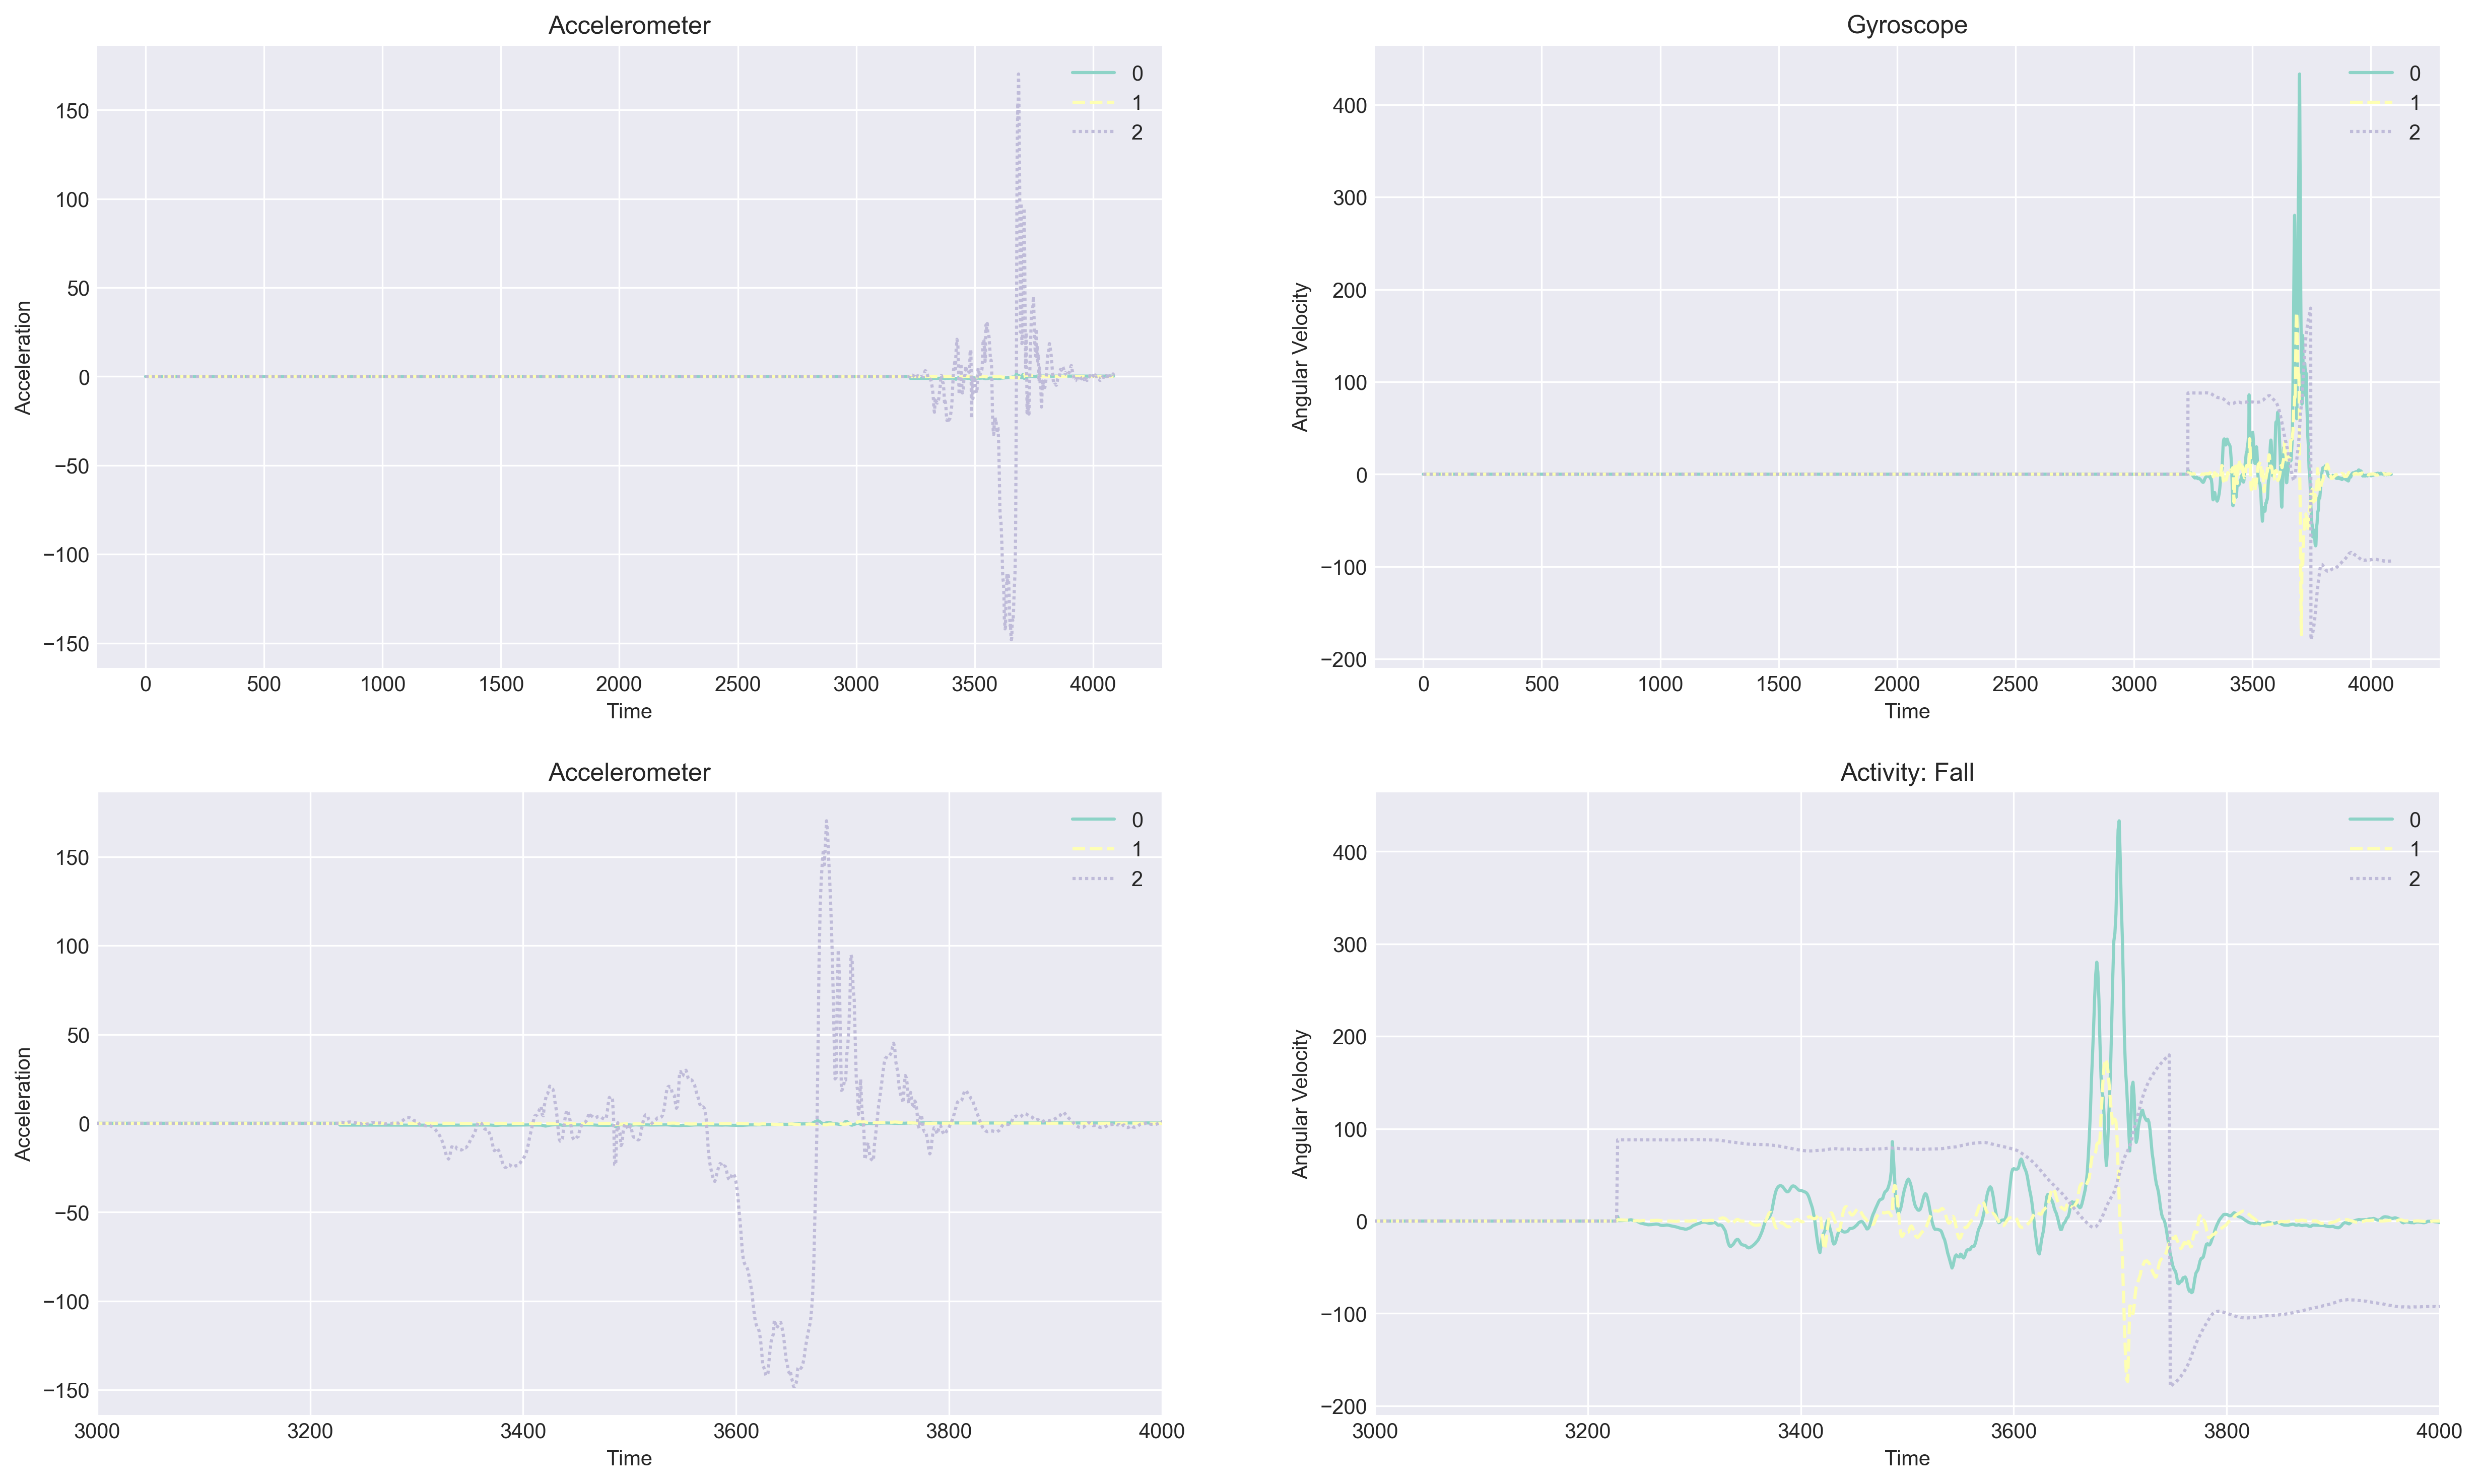

In [27]:
i = random.randint(0, len(train_data))

fix, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.lineplot(train_data[i][:, 1:4], ax=ax[0][0])
ax[0][0].set_title('Accelerometer')
ax[0][0].set_xlabel('Time')
ax[0][0].set_ylabel('Acceleration')

sns.lineplot(train_data[i][:, 4:7], ax=ax[0][1])
ax[0][1].set_title('Gyroscope')
ax[0][1].set_xlabel('Time')
ax[0][1].set_ylabel('Angular Velocity')

# Plot the same but with xlims
sns.lineplot(train_data[i][:, 1:4], ax=ax[1][0])
ax[1][0].set_title('Accelerometer')
ax[1][0].set_xlabel('Time')
ax[1][0].set_ylabel('Acceleration')
ax[1][0].set_xlim(3000, 4000)

sns.lineplot(train_data[i][:, 4:7], ax=ax[1][1])
ax[1][1].set_title('Gyroscope')
ax[1][1].set_xlabel('Time')
ax[1][1].set_ylabel('Angular Velocity')
ax[1][1].set_xlim(3000, 4000)

plt.title(f'Activity: {train_labels[i]}')

### Train Tree based model

In [12]:
from sklearn.model_selection import train_test_split

# Encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
le2 = LabelEncoder()
train_labels_multiclass_encoded = le2.fit_transform(train_labels_multiclass)

x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels_encoded, test_size=0.2, random_state=42, shuffle=True, stratify=train_labels_encoded)

# Reshape the x_train and x_test to 2D
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
# Reshape the y_train and y_test to 1D
# y_train = y_train.reshape(-1)
# y_test = y_test.reshape(-1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4060, 36783), (4060,), (1015, 36783), (1015,))

In [19]:
import lightgbm as lgb

classifier = lgb.LGBMClassifier(
    colsample_bytree=0.5,
    max_depth=10,
    )
classifier.fit(x_train, y_train, verbose=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(colsample_bytree=0.5, max_depth=10)

In [20]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00       469

    accuracy                           1.00      1015
   macro avg       1.00      1.00      1.00      1015
weighted avg       1.00      1.00      1.00      1015



In [21]:
classifier.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.5,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

### Train CNN Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import confusion_matrix, classification_report

2023-04-24 01:04:23.708759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
train_labels_encoded = train_labels_encoded.reshape(-1, 1)
le = LabelEncoder()
le.fit(train_labels_multiclass)
train_labels_multiclass_encoded = le.transform(train_labels_multiclass)
train_labels_multiclass_encoded = train_labels_multiclass_encoded.reshape(-1, 1)

ohe = OneHotEncoder()
ohe.fit(train_labels_encoded)
train_labels_onehot = ohe.transform(train_labels_encoded).toarray()
ohe = OneHotEncoder()
train_labels_multiclass_onehot = ohe.fit_transform(train_labels_multiclass_encoded).toarray()

train_labels_onehot.shape, train_labels_multiclass_onehot.shape

In [73]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(train_data, train_labels_onehot, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((4060, 4087, 10), (1015, 4087, 10), (4060, 2), (1015, 2))

In [63]:
def cnn_model_v1(input_shape, num_classes):
    model = Sequential()

    model.add(Conv1D(32, 2, 1, activation='relu', input_shape=input_shape))
    model.add(Conv1D(32, 2, 1, activation='relu'))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(16, 2, 1, activation='relu'))
    model.add(Conv1D(16, 2, 1, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(16, 2, 1, activation='relu'))
    model.add(Conv1D(16, 2, 1, activation='relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(32, 2, 1, activation='relu'))
    model.add(Conv1D(32, 2, 1, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [64]:
model_v1 = cnn_model_v1(input_shape=train_data[0].shape, num_classes=2)
model_v1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 4085, 64)          1984      
                                                                 
 conv1d_13 (Conv1D)          (None, 4083, 64)          12352     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2041, 64)         0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 2039, 128)         24704     
                                                                 
 conv1d_15 (Conv1D)          (None, 2037, 128)         49280     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1018, 128)        0         
 1D)                                                  

In [ ]:
# Compile the model
model_v1.compile(
	optimizer=tf.optimizers.Adam(learning_rate=0.0001),
	# Loss for binary classification
	loss='binary_crossentropy',
	metrics=['accuracy']
)

# Train the model
model_v1_history = model_v1.fit(
	Xtrain,
	ytrain,
	epochs=10,
	batch_size=32,
	validation_split=0.2,
	verbose=1
)

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Sample class 1 and 2 from the dataset
from numpy.random import shuffle


x_train_class1 = x_train[y_train[:, 1] == 1]
y_train_class1 = np.array([0] * len(x_train_class1))
x_train_class2 = x_train[y_train[:, 2] == 1]
y_train_class2 = np.array([1] * len(x_train_class2))

# Concatenate the two classes
x_train = np.concatenate((x_train_class1, x_train_class2))
y_train = np.concatenate((y_train_class1, y_train_class2))
y_train = keras.utils.to_categorical(y_train, num_classes)

# Split the dataset into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
# Evaluate the model
model_v1.evaluate(Xtest, ytest)

# Plot the training and validation loss and the accuracy values achieved during training
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(model_v1_history.history['loss'], ax=ax[0], label='Training Loss')
sns.lineplot(model_v1_history.history['val_loss'], ax=ax[0], label='Validation Loss')
ax[0].legend(loc='upper right')
ax[0].set_title('Training and Validation Loss')

sns.lineplot(model_v1_history.history['accuracy'], ax=ax[1], label='Training Accuracy')
sns.lineplot(model_v1_history.history['val_accuracy'], ax=ax[1], label='Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Training and Validation Accuracy')


In [ ]:
# Make predictions
y_pred = model_v1.predict(Xtest)

# Convert the predictions to labels
y_pred = np.argmax(y_pred, axis=1)

# Make a classification report
print(classification_report(np.argmax(ytest, axis=1), y_pred))

In [74]:
Xtrain.shape

(4060, 4087, 10)

---

## UMAFall Data

In [3]:
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../../../Downloads/UMAFall_Dataset/UMAFall_Subject_02_Fall_backwardFall_2_2016-06-13_20-52-16.csv')
df

,% Universidad de Malaga - ETSI de Telecomunicacion (Spain)
0,% Date: 2016-06-13_20:52:16
1,% ID: Subject_02_FALL_backwardFall_2
2,% Name: Subject_02
3,% Age: 22
4,% Height(cm): 167
...,...
6596,14766;295;-37.16666793823242;-2.166666746139526;97.33333587646484;2;4
6597,14824;296;-36.83333206176758;-2.166666746139526;96.16666412353516;2;4
6598,14864;297;-37;-3.166666746139526;96;2;4
6599,14909;298;-37;-3.5;95.33333587646484;2;4


In [5]:
def get_subject_data(df: pd.DataFrame) -> pd.DataFrame:
	subject_columns = ['Age', 'Height(cm)', 'Weight(Kg)', 'Gender', 'Type of Movement', 'Description of the movement']
	# Initialize the subject_data with empty values
	subject_data = pd.DataFrame(columns=subject_columns)

	# % Date: 2016-06-13_20:52:16
	# % ID: Subject_02_FALL_backwardFall_2
	# % Name: Subject_02
	# % Age: 22
	# % Height(cm): 167
	# % Weight(Kg): 63
	# % Gender: F              

	# These are in the first rows of the df exactly as shown above
	# Extract the features Age, Height, Weight and Gender
	for index, row in df.iloc[1:10].iterrows():
		str = row.to_string().split(':')
		feature_name = str[0].split('%')[-1].strip()
		feature_value = str[1].split('.')[0].strip()
		if feature_name in subject_columns and subject_data[feature_name].isnull().all():
			subject_data[feature_name] = [feature_value]

	return subject_data

subject_data = get_subject_data(df)
subject_data

,Age,Height(cm),Weight(Kg),Gender,Type of Movement,Description of the movement
0,24,179,68,M,FALL,backwardFall


In [6]:
df.iloc[7:21]

,% Universidad de Malaga - ETSI de Telecomunicacion (Spain)
7,% Type of Movement: FALL
8,% Type of Movement: TRUE
9,% Description of the movement: backwardFall
10,% Trial: 4
11,% Number of Sensors: 5
12,% Used Smartphone: LGE-lge-LG-H815-5.1
13,% Smartphone's Accelerometer: LGE Accelerometer - Vendor: BOSCH
14,% --> Version: 1
15,% --> Min - Max Delay: 5000us - 65535000us
16,% --> Maximum Range: 16.000000263891405 G


In [7]:
df.iloc[12].to_string().split(':')[-1].strip()

'LGE-lge-LG-H815-5.1'

In [8]:
# % Used Smartphone: LGE-lge-LG-H815-5.1
# % Smartphone's Accelerometer: LGE Accelerometer - Vendor: BOSCH                    
# % --> Version: 1
# % --> Min - Max Delay: 5000us - 65535000us
# % --> Maximum Range: 16.000000263891405 G
# % --> Resolution: 1.2136514986004396E-4 G
                                                                                    
# % SensorTag's Accelerometer: MPU-9250 MEMS MotionTracking Device - Invensense
# % --> Maximum Range: 16 G
# % --> Resolution: 0.00024 G

def get_meta_data(df: pd.DataFrame) -> pd.DataFrame:
	metadata = pd.DataFrame()
	metadata_columns = ['Used Smartphone', 'Smartphone\'s Accelerometer', 'Accelerometer Vendor', 'SensorTag\'s Accelerometer', 'MotionTracking Device']
	metadata[metadata_columns[0]] = [df.iloc[12].to_string().split(':')[-1].strip()]
	metadata[metadata_columns[1]] = [df.iloc[13].to_string().split(':')[1].split('-')[0].strip().split(' ')[0]]
	metadata[metadata_columns[2]] = [df.iloc[13].to_string().split(':')[-1].strip()]
	metadata[metadata_columns[3]] = [df.iloc[18].to_string().split(':')[1].strip().split(' ')[0]]
	metadata[metadata_columns[4]] = [df.iloc[18].to_string().split(':')[1].strip().split(' ')[-1]]
	return metadata

metadata = get_meta_data(df)
metadata

,Used Smartphone,Smartphone's Accelerometer,Accelerometer Vendor,SensorTag's Accelerometer,MotionTracking Device
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense


In [9]:
df.iloc[31:]

,% Universidad de Malaga - ETSI de Telecomunicacion (Spain)
31,% TimeStamp; Sample No; X-Axis; Y-Axis; Z-Axis; Sensor Type; Sensor ID;
32,134;1;-0.1407038569450378;0.9731737375259399;-0.07264378666877747;0;0
33,134;2;-0.1414351463317871;0.976834774017334;-0.07276669889688492;0;0
34,134;3;-0.1429008096456528;0.9775676131248474;-0.07044684141874313;0;0
35,134;4;-0.1463191360235214;0.9746378064155579;-0.06739570945501328;0;0
...,...
6586,14790;295;19.83333396911621;4.5;189;2;4
6587,14838;296;-21.33333396911621;4;189.3333282470703;2;4
6588,14886;297;20.16666603088379;3.666666746139526;189;2;4
6589,14928;298;21.16666603088379;3.833333253860474;188.8333282470703;2;4


In [10]:
# % TimeStamp; Sample No; X-Axis; Y-Axis; Z-Axis; Sensor Type; Sensor ID;            
# 99;1;-0.1653603315353394;0.9335011839866638;-0.03931934759020805;0;0
# 99;2;-0.1691443026065826;0.9350882172584534;-0.04066209867596626;0;0
# 99;3;-0.1667030900716782;0.9365538954734802;-0.03993082046508789;0;0
def get_time_series_data(df: pd.DataFrame) -> pd.DataFrame:
	time_series_data = pd.DataFrame()
	time_series_columns = ['TimeStamp', 'Sample No', 'X-Axis', 'Y-Axis', 'Z-Axis', 'Sensor Type', 'Sensor ID']

	# Extract the time series data which starts from row 32
	for index, row in df.iloc[32:].iterrows():
		str = row.to_string().strip().split(';')
		str[0] = str[0].split(' ')[-1]
		time_series_data = pd.concat([time_series_data, pd.DataFrame([str], columns=time_series_columns)])
	
	return time_series_data

time_series_data = get_time_series_data(df)
time_series_data.head()

,TimeStamp,Sample No,X-Axis,Y-Axis,Z-Axis,Sensor Type,Sensor ID
0,134,1,-0.1407038569450378,0.9731737375259399,-0.07264378666877747,0,0
0,134,2,-0.1414351463317871,0.976834774017334,-0.07276669889688492,0,0
0,134,3,-0.1429008096456528,0.9775676131248474,-0.07044684141874313,0,0
0,134,4,-0.1463191360235214,0.9746378064155579,-0.06739570945501328,0,0
0,134,5,-0.1470504105091095,0.9731737375259399,-0.06397737562656403,0,0


In [11]:
tsc = time_series_data.copy()

In [12]:
# Sensor Type 0 is the accelerometer
# Sensor Type 1 is the gyroscope
# Sensor Type 2 is the magnetometer
sensor_types = {
	0: 'Accelerometer',
	1: 'Gyroscope',
	2: 'Magnetometer'
}

# Sensor ID 0 is the right pocket
# Sensor ID 1 is the chest
# Sensor ID 2 is the waist
# Sensor ID 3 is the wrist
# Sensor ID 4 is the ankle
sensor_ids = {
	0: 'Right Pocket',
	1: 'Chest',
	2: 'Waist',
	3: 'Wrist',
	4: 'Ankle'
}

def convert_time_series_data(time_series_data: pd.DataFrame, sensor_types, sensor_ids) -> pd.DataFrame:
	# Convert the columns to numeric
	time_series_data = time_series_data.apply(pd.to_numeric)
	time_series_data['TimeStamp'] = pd.to_datetime(time_series_data['TimeStamp'], unit='ms')
	time_series_data['Sensor ID'] = time_series_data['Sensor ID'].apply(lambda x: sensor_ids[x])
	time_series_data['Sensor Type'] = time_series_data['Sensor Type'].apply(lambda x: sensor_types[x])

	return time_series_data

time_series_data = convert_time_series_data(tsc.copy(), sensor_types, sensor_ids)
time_series_data.head()

,TimeStamp,Sample No,X-Axis,Y-Axis,Z-Axis,Sensor Type,Sensor ID
0,1970-01-01 00:00:00.134,1,-0.140704,0.973174,-0.072644,Accelerometer,Right Pocket
0,1970-01-01 00:00:00.134,2,-0.141435,0.976835,-0.072767,Accelerometer,Right Pocket
0,1970-01-01 00:00:00.134,3,-0.142901,0.977568,-0.070447,Accelerometer,Right Pocket
0,1970-01-01 00:00:00.134,4,-0.146319,0.974638,-0.067396,Accelerometer,Right Pocket
0,1970-01-01 00:00:00.134,5,-0.147050,0.973174,-0.063977,Accelerometer,Right Pocket


In [13]:
time_series_data[
    (time_series_data['Sensor ID'] == 'Right Pocket') 
    & (time_series_data['Sensor Type'] == 'Accelerometer') 
].shape, time_series_data.shape

((2971, 7), (6559, 7))

In [14]:
(2978 / 15) / 200

0.9926666666666667

<Axes: xlabel='TimeStamp'>

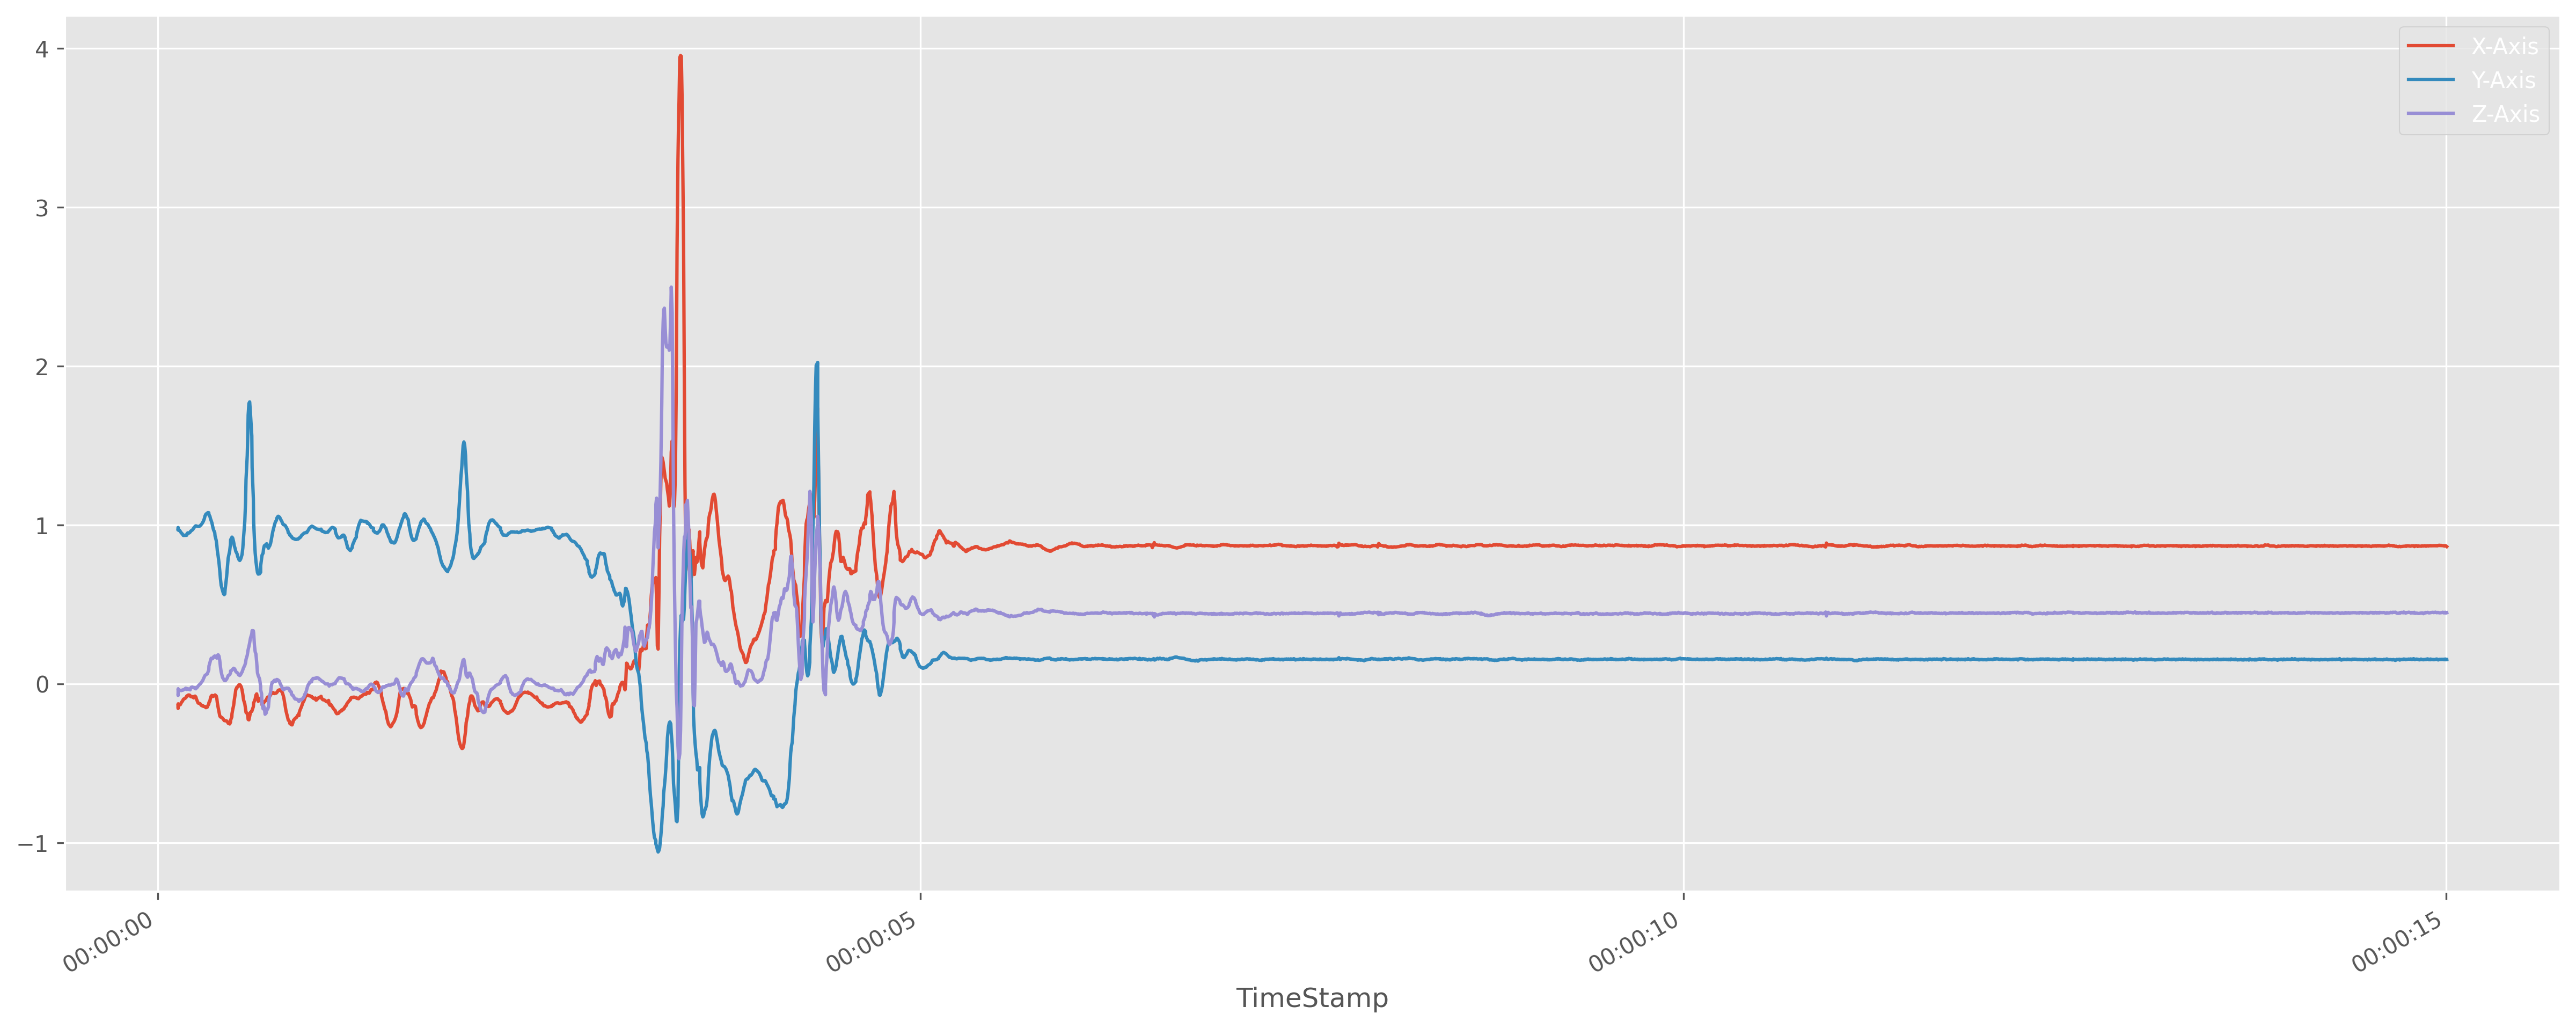

In [15]:
time_series_data[
    (time_series_data['Sensor ID'] == 'Right Pocket') & (time_series_data['Sensor Type'] == 'Accelerometer')
    ].plot(x='TimeStamp', y=['X-Axis', 'Y-Axis', 'Z-Axis'])

array([[<Axes: title={'center': 'X-Axis'}>,
        <Axes: title={'center': 'Y-Axis'}>],
       [<Axes: title={'center': 'Z-Axis'}>, <Axes: >]], dtype=object)

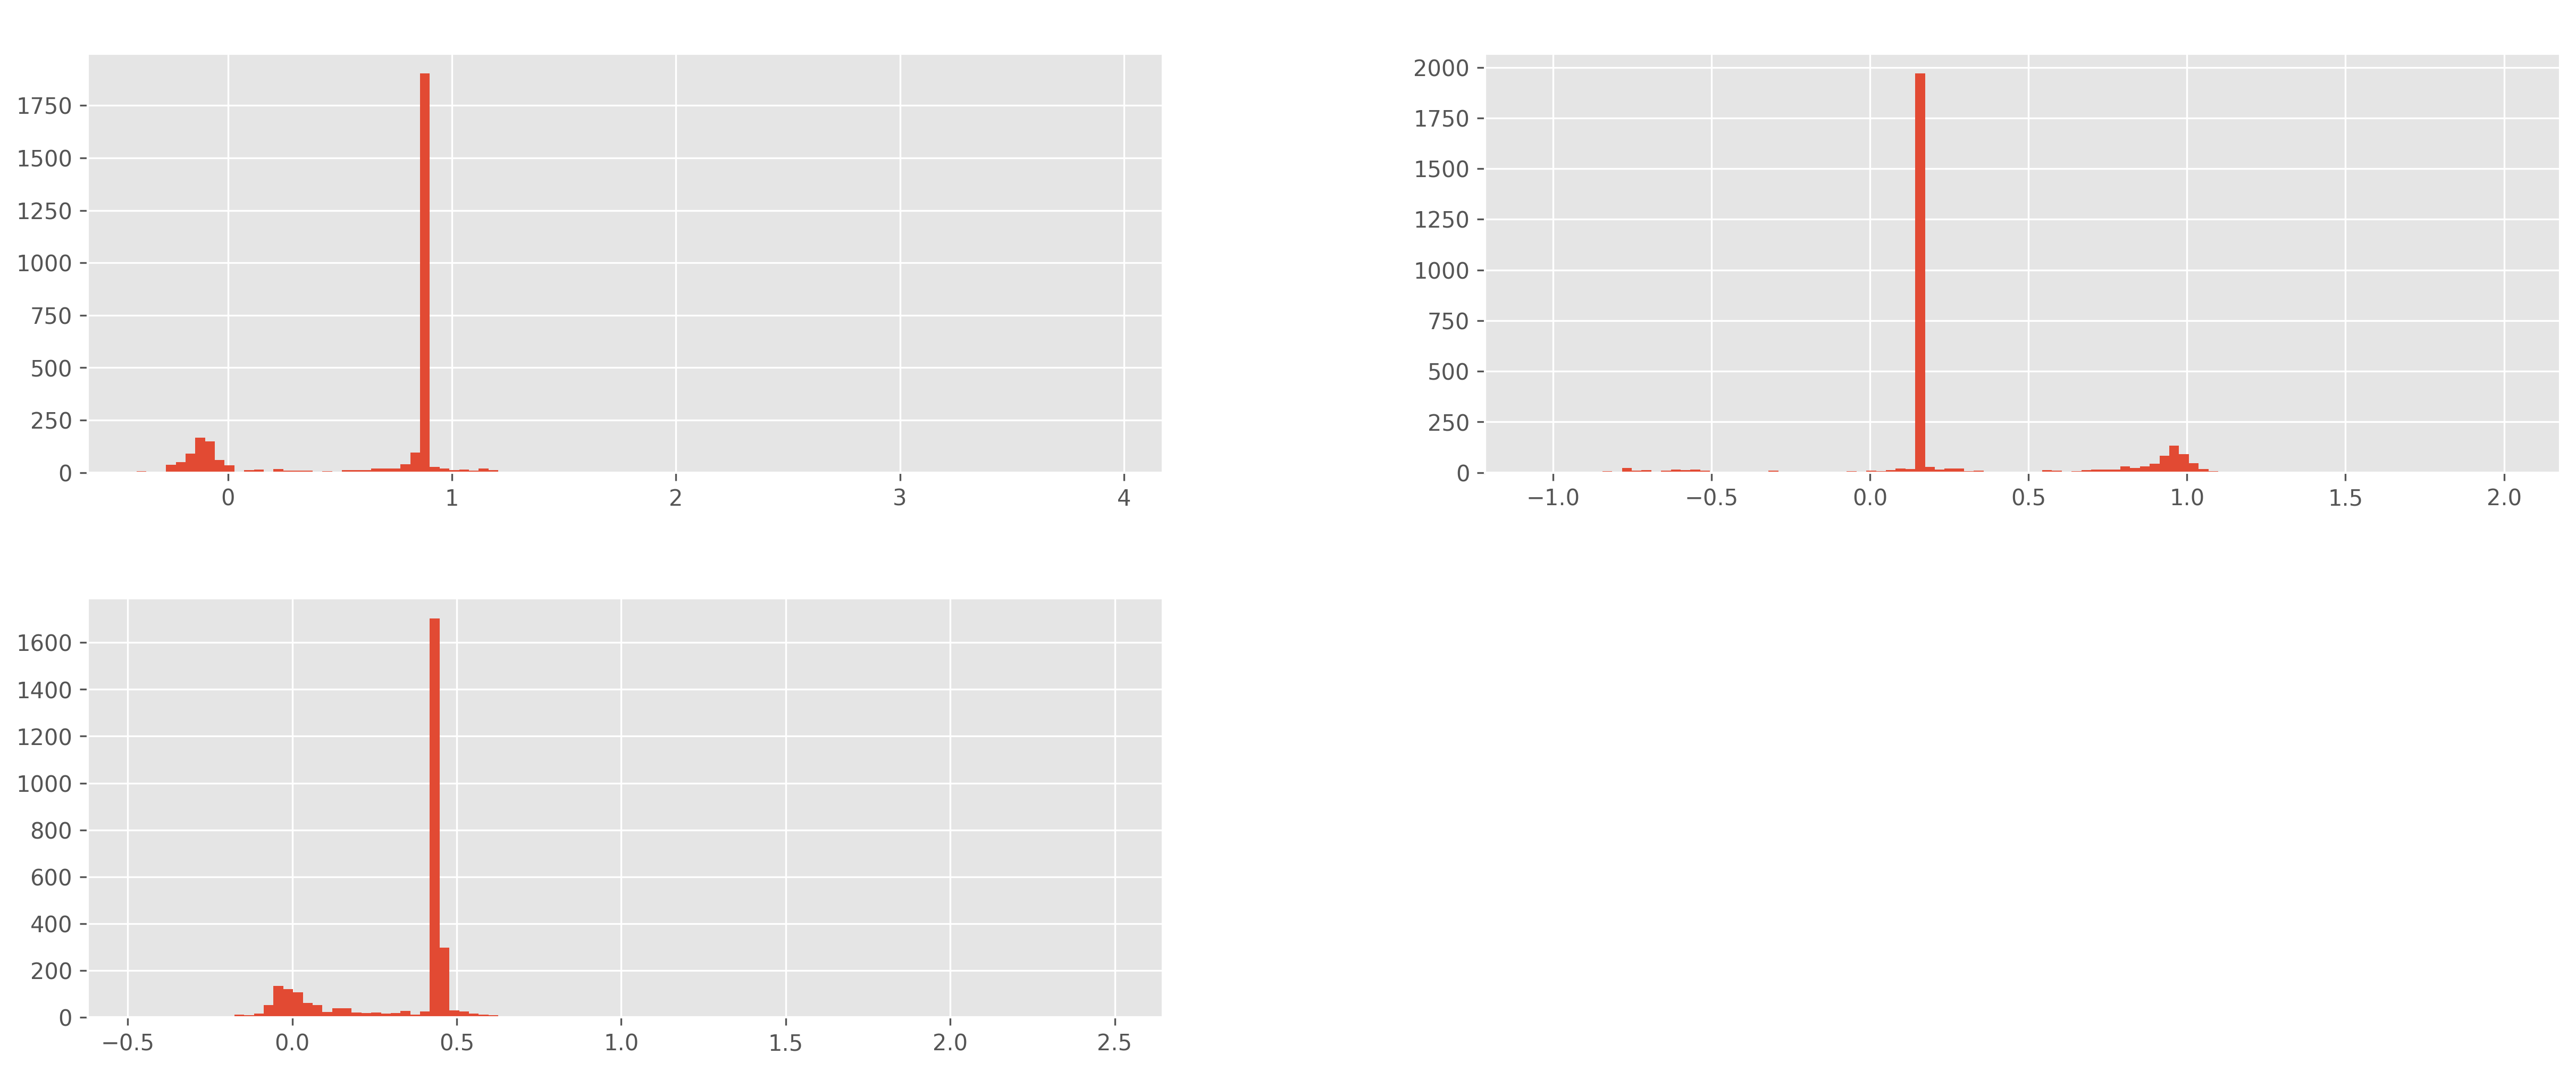

In [17]:
# Plot the histogram of the X-Axis, Y-Axis and Z-Axis
time_series_data[
    (time_series_data['Sensor ID'] == 'Right Pocket') & (time_series_data['Sensor Type'] == 'Accelerometer')
    ].hist(column=['X-Axis', 'Y-Axis', 'Z-Axis'], bins=100)

In [18]:
# Couple subject_data, metadata and time_series_data into one dictionary
complete_data = {
    'subject_data': subject_data,
    'metadata': metadata,
    'time_series_data': time_series_data
}

In [21]:
# Now do the whole process for all the files in the folder
import os
import time

directory_path = '../../../Downloads/UMAFall_Dataset'
files = os.listdir(directory_path)
files = [file for file in files if file.endswith('.csv')]
print(f'Found {len(files)} files')
print()
complete_data = {}
i = 0
count = 10
start = time.perf_counter()
for file in files[:count]:
	df = pd.read_csv(os.path.join(directory_path, file))
	subject_data = get_subject_data(df)
	metadata = get_meta_data(df)
	time_series_data = get_time_series_data(df)
	time_series_data = convert_time_series_data(time_series_data, sensor_types, sensor_ids)
	complete_data[file] = {
		'subject_data': subject_data,
		'metadata': metadata,
		'time_series_data': time_series_data
	}
	# i += 1
	# print(i)
end = time.perf_counter()
print(f'Time taken for {count} files to process: {end - start}')

Found 746 files

Time taken for 10 files to process: 72.21138745301869


In [22]:
uma_ts_shape = [
    data['time_series_data'].shape for data in list(complete_data.values())
]

uma_ts_shape = set(uma_ts_shape)
uma_ts_shape

{(5657, 7),
 (5732, 7),
 (6489, 7),
 (6559, 7),
 (6565, 7),
 (6570, 7),
 (6572, 7),
 (6576, 7),
 (6624, 7),
 (6629, 7)}

In [140]:
subject_datas = pd.DataFrame()
for key, value in complete_data.items():
	subject_datas = pd.concat([subject_datas, value['subject_data']])

subject_datas

,Age,Height(cm),Weight(Kg),Gender,Type of Movement,Description of the movement
0,24,179,68,M,FALL,backwardFall
0,68,168,97,M,ADL,Aplausing
0,24,177,65,M,ADL,MakingACall
0,24,177,66,M,ADL,Jogging
0,24,175,79,M,FALL,lateralFall
0,22,167,57,F,FALL,forwardFall
0,27,173,90,M,ADL,MakingACall
0,24,177,66,M,ADL,LyingDown_OnABed
0,22,164,52,F,ADL,Bending
0,22,164,52,F,ADL,Hopping


In [141]:
metadatas = pd.DataFrame()
for key, value in complete_data.items():
	metadatas = pd.concat([metadatas, value['metadata']])

metadatas

,Used Smartphone,Smartphone's Accelerometer,Accelerometer Vendor,SensorTag's Accelerometer,MotionTracking Device
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,samsung-samsung-SM-G900F-5.0,MPU6500,Invensense,MPU-9250,Invensense
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,LGE-lge-LG-H815-5.1,LGE,BOSCH,MPU-9250,Invensense
0,samsung-samsung-SM-G900F-5.0,MPU6500,Invensense,MPU-9250,Invensense
0,samsung-samsung-SM-G900F-5.0,MPU6500,Invensense,MPU-9250,Invensense
0,samsung-samsung-SM-G900F-5.0,MPU6500,Invensense,MPU-9250,Invensense
